In [28]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns
sns.set()

import plotly.express as px
import matplotlib.pyplot as plt

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats


In [5]:
! dir data

 Volume in drive C is Windows-SSD
 Volume Serial Number is 58FE-F308

 Directory of C:\Users\afsan\2022-fall-data-science\Week-08-Data-Visualization\data

10/29/2022  02:36 PM    <DIR>          .
10/29/2022  09:59 PM    <DIR>          ..
10/29/2022  02:36 PM         2,336,532 budget-sample.csv
10/29/2022  02:36 PM           353,004 BX-Police.csv
10/29/2022  02:36 PM             4,613 Iris.csv
10/29/2022  02:36 PM               476 Sales.csv
10/29/2022  02:36 PM            20,258 Stocks.csv
               5 File(s)      2,714,883 bytes
               2 Dir(s)  404,804,022,272 bytes free


# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [86]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/budget-sample.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,826,DEPT OF ENVIRONMENT PROTECTION,BROWN,TRACYANN,NaN,02/23/2004,QUEENS,COMMUNITY ASSISTANT,ACTIVE,37816.0,per Annum,2080.0,37235.48,11.00,206.04,1309.56
1,2020,56,POLICE DEPARTMENT,WONG,CHIWAI,NaN,07/08/2015,BROOKLYN,POLICE OFFICER,ACTIVE,63125.0,per Annum,2080.0,60758.85,343.13,10842.71,10325.31
2,2020,742,DEPT OF ED PEDAGOGICAL,FARRELL,TARA,E,09/09/1996,MANHATTAN,TEACHER SPECIAL EDUCATION,ACTIVE,121226.0,per Annum,0.0,118638.72,0.00,0.00,13069.69
3,2020,827,DEPARTMENT OF SANITATION,ATTANASIO,JOSEPH,NaN,10/18/1999,QUEENS,SANITATION WORKER,ACTIVE,77318.0,per Annum,2080.0,75833.83,455.50,28225.89,17602.11
4,2020,744,DEPT OF ED PARA PROFESSIONALS,MCNEIL,GLORIA,D,09/28/1989,MANHATTAN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.00,0.00,5076.22


In [8]:
df.shape

(16660, 17)

In [9]:
df.isnull().sum()

fiscal_year                      0
payroll_number                   0
agency_name                      0
last_name                       18
first_name                      18
mid_init                      6706
agency_start_date                3
work_location_borough            0
title_description                1
leave_status_as_of_june_30       0
base_salary                      0
pay_basis                        0
regular_hours                    0
regular_gross_paid               0
ot_hours                         0
total_ot_paid                    0
total_other_pay                  0
dtype: int64

In [10]:
#Remove null values

df = df.dropna() 
print(df.shape)

(9954, 17)


In [11]:
# Sanity check
df.isnull().sum()

fiscal_year                   0
payroll_number                0
agency_name                   0
last_name                     0
first_name                    0
mid_init                      0
agency_start_date             0
work_location_borough         0
title_description             0
leave_status_as_of_june_30    0
base_salary                   0
pay_basis                     0
regular_hours                 0
regular_gross_paid            0
ot_hours                      0
total_ot_paid                 0
total_other_pay               0
dtype: int64

In [12]:
#check for dulplicates
df.duplicated().sum()

0

Text(0, 0.5, 'Count')

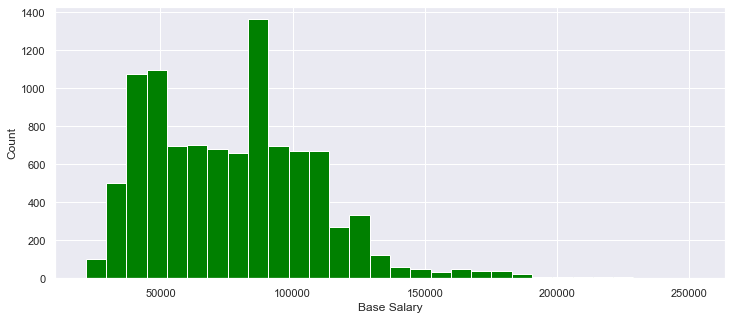

In [34]:
df['base_salary'].hist(bins=30, figsize=(12,5), color='green');
plt.xlabel('Base Salary')
plt.ylabel('Count')

In [35]:
print('This histogram shows that many people make between 80k - 90k, or minimum wage ')

This histogram shows that many people make between 80k - 90k, or minimum wage 


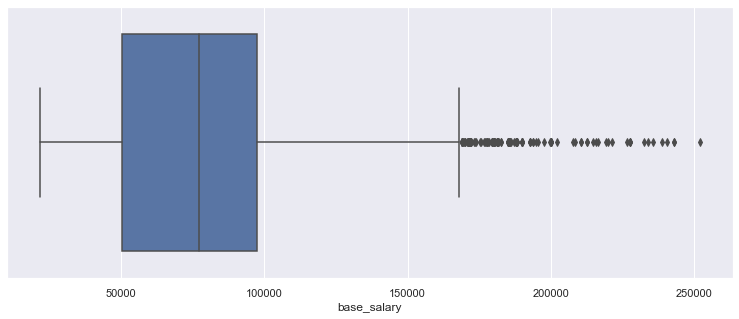

In [40]:
axes = plt.subplots(figsize=(13,5))
ax = sns.boxplot(data=df, x='base_salary');

In [ ]:
print('There are many outliers that have a higher base salary in the company')

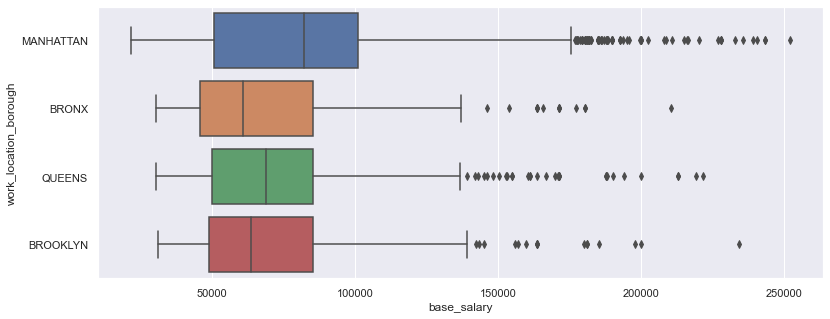

In [41]:
axes = plt.subplots(figsize=(13,5))
ax = sns.boxplot(data=df, x='base_salary', y = 'work_location_borough');

In [42]:
df.work_location_borough.value_counts()

MANHATTAN    6506
QUEENS       1423
BROOKLYN     1333
BRONX         692
Name: work_location_borough, dtype: int64

In [45]:
print('Based on the data Manhattan has the most outliers in the high salary range. Queens and Brooklyn are similar'
      + '\nbut Bronx has the least overall')

Based on the data Manhattan has the most outliers in the high salary range. Queens and Brooklyn are similar
but Bronx has the least overall


Text(0.5, 0, 'Count')

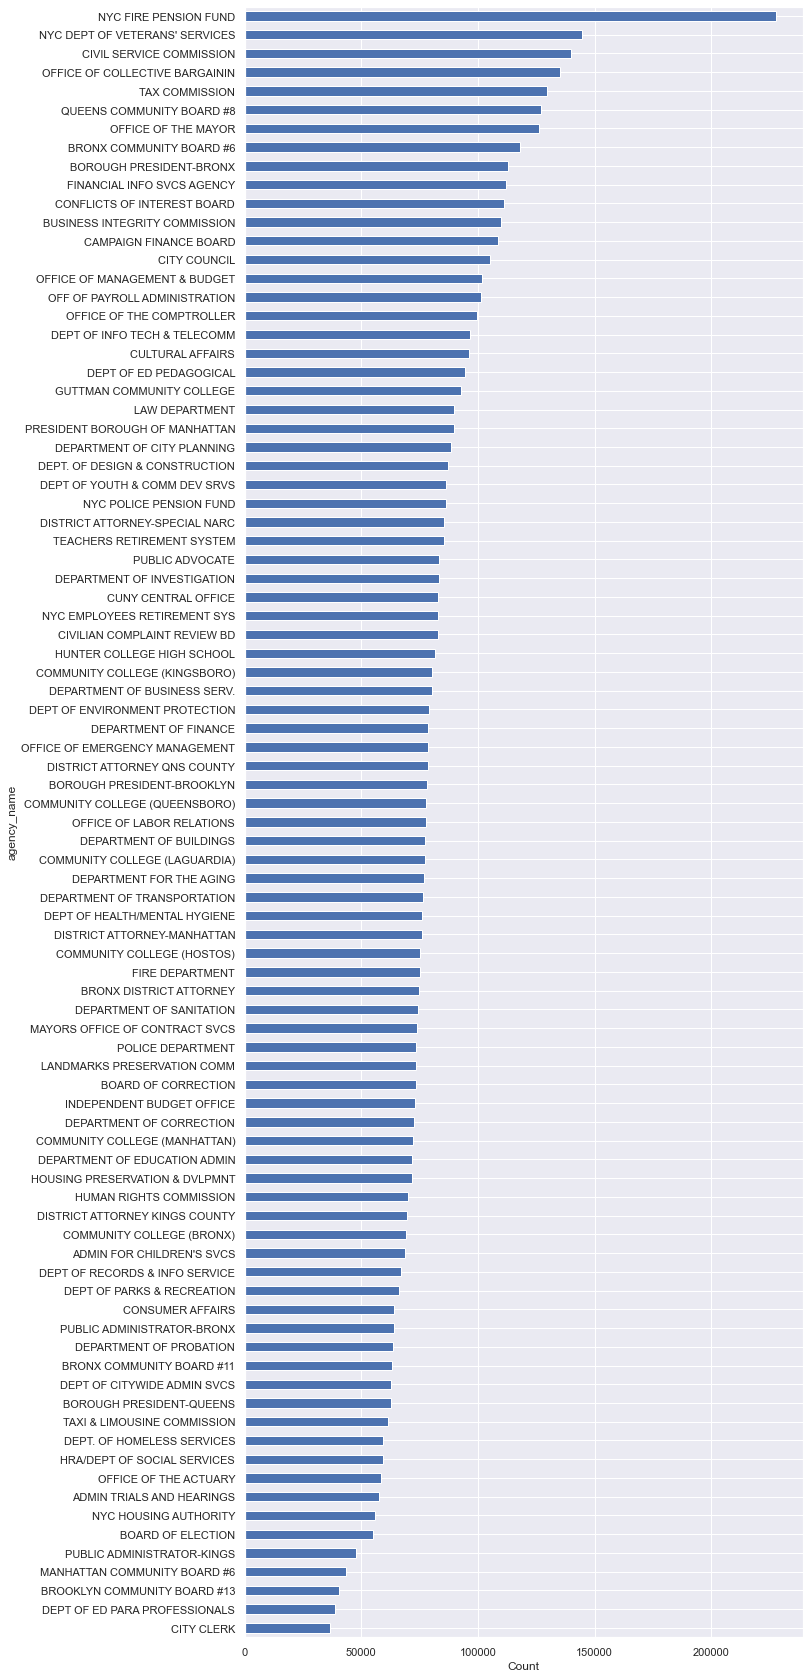

In [87]:
#Make a plot visualizing the difference average base salaries based on agency_name. 

gb = df.groupby('agency_name')
agency_mean = gb['base_salary'].mean().sort_values()
agency_mean.plot(kind='barh', figsize=(10, 30))
plt.xlabel('Count')

In [53]:
#Who would you want to work for based on this information?
print('Based on this information I would want to work with NYC Fire Pension Fund. They had almost double the second'
     + '\nhighest agencys base salary')

Based on this information I would want to work with NYC Fire Pension Fund. They had almost double the second
highest agencys base salary


# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [102]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/BX-Police.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56


In [103]:
df.shape

(2574, 17)

Text(0, 0.5, 'Base Salary')

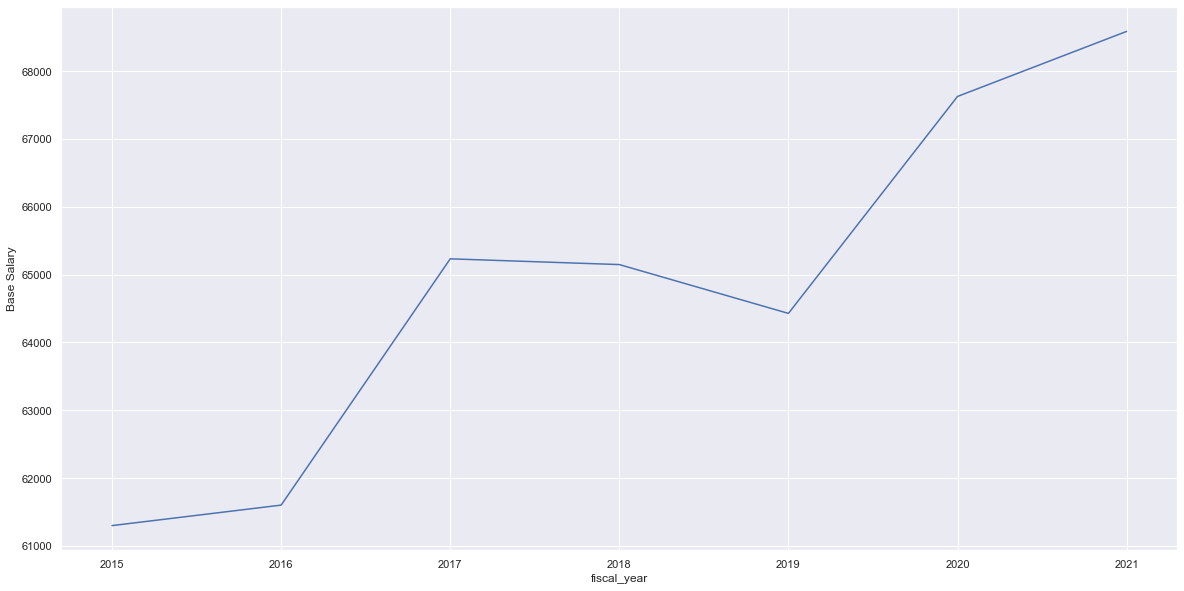

In [105]:
#create a time series chart illustrating their average base salary over time (by fiscal_year)
gb = df.groupby('fiscal_year')
sal_mean = gb['base_salary'].mean()
sal_mean.plot(kind='line', figsize=(20, 10))
plt.ylabel('Base Salary')

In [106]:
df.fiscal_year.value_counts()

2019    386
2020    381
2017    380
2018    375
2021    373
2015    352
2016    327
Name: fiscal_year, dtype: int64

In [108]:
#Remove null values

df = df.dropna() 
print(df.shape)

(1039, 17)


In [109]:
# Sanity check
df.isnull().sum()

fiscal_year                   0
payroll_number                0
agency_name                   0
last_name                     0
first_name                    0
mid_init                      0
agency_start_date             0
work_location_borough         0
title_description             0
leave_status_as_of_june_30    0
base_salary                   0
pay_basis                     0
regular_hours                 0
regular_gross_paid            0
ot_hours                      0
total_ot_paid                 0
total_other_pay               0
dtype: int64

Text(0, 0.5, 'Base Salary')

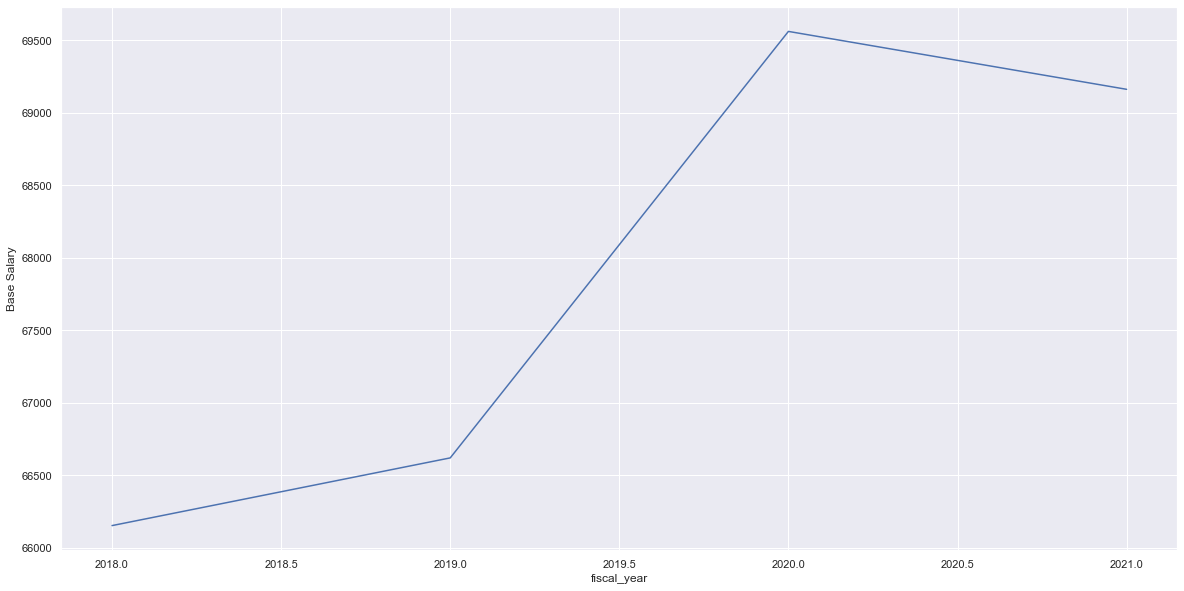

In [110]:
#create a time series chart illustrating their average base salary over time (by fiscal_year)
gb = df.groupby('fiscal_year')
base_mean = gb['base_salary'].mean()
base_mean.plot(kind='line', figsize=(20, 10))
plt.ylabel('Base Salary')

In [111]:
df.fiscal_year.value_counts()

2021    266
2019    263
2018    261
2020    249
Name: fiscal_year, dtype: int64

In [112]:
print('The data shows the salary increases and decreases gradually, with larger increases every 2 years.'
     + '\nIt could be in part to comp adjustments based on the market, or inflation.'
      + '\n I noticed that dropping Null values removes data from 2015-2017. Since the duplicates are payroll numbers'
     +'\n I decided to keep them in. Since they could be in different districts with the same number')

The data shows the salary increases and decreases gradually, with larger increases every 2 years.
It could be in part to comp adjustments based on the market.
 I noticed that dropping Null values removes data from 2015-2017. Since the duplicates are payroll numbers
 I decided to keep them in. Since they could be in different districts with the same number


# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [113]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/stocks.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG


In [114]:
df.isnull().sum()

Date         0
Volume       0
High         0
Low          0
Open         0
Close        0
Adj Close    0
Ticker       0
dtype: int64

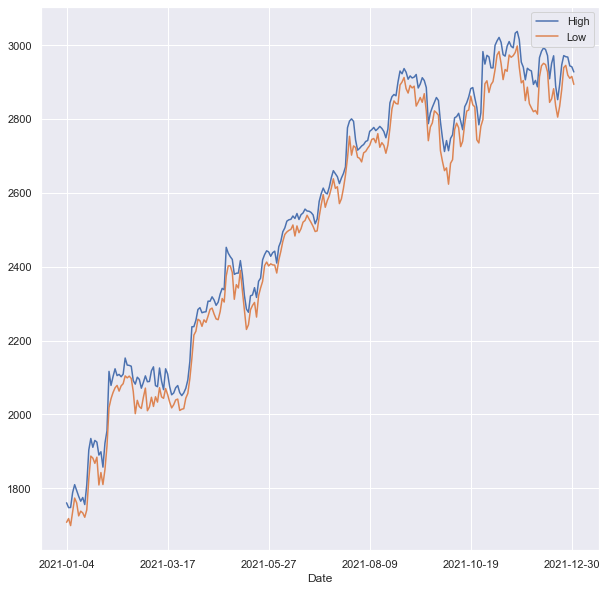

In [134]:
fig, ax = plt.subplots()

df.plot(kind='line', x='Date', y='High', label = 'High', ax=ax, figsize=(10,10))
df.plot(kind='line', x='Date', y='Low', label = 'Low', ax=ax, figsize=(10,10))
plt.legend()
plt.show()

# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [135]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/Sales.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740


In [136]:
df.shape

(12, 7)

In [137]:
df.isnull().sum()

month_number    0
facecream       0
facewash        0
toothpaste      0
bathingsoap     0
shampoo         0
moisturizer     0
dtype: int64

Text(0, 0.5, 'Sales')

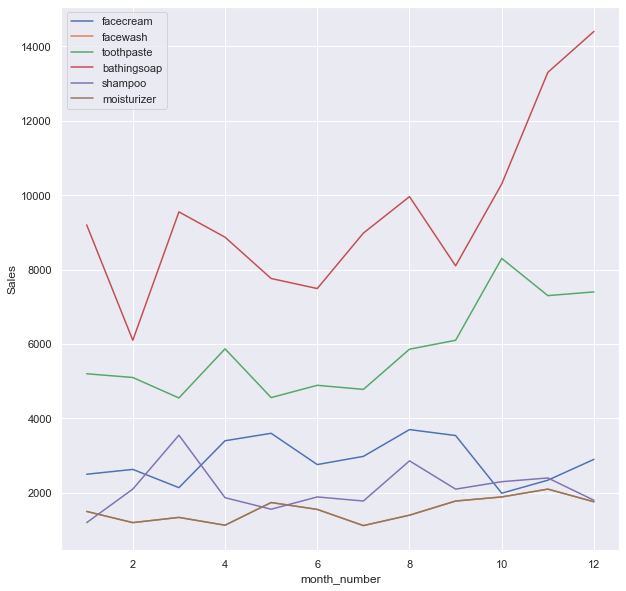

In [146]:
#make a time series chart that shows the sales for each item over the past 12 months.
features = ['facecream', 'facewash', 'toothpaste',
               'bathingsoap',  'shampoo', 'moisturizer']

df.plot(kind = 'line', x='month_number', y=features, figsize=(10,10))
plt.ylabel('Sales')

In [ ]:
#What does this tell you about the items.
#Which item would you recommend they push more of and which item/s would you recommend they stop selling?

print('The data tells us that mousturizer and shampoo makes the least, so I would recommend stop selling either product.'
     '\nI would push bathing soap since it sees high sales and also toothpaste since it has a steady increase in sales.')


In [145]:
#show what percentage of each item contributes to total sales.
total_sales = df[features].sum().sum() 

products = df[features].sum()

total = products/total_sales*100
print(total)

facecream      12.277453
facewash        6.592722
toothpaste     24.893178
bathingsoap    40.596069
shampoo         9.047856
moisturizer     6.592722
dtype: float64
